# Diabetes Prediction in Keras

## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)


The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.


### Importing all required libraries :

In [3]:
import warnings
import skillsnetwork
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Using TensorFlow backend.


### Importing dataset and loading it

In [6]:
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module2/L2/diabetes.csv", overwrite=True)

names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('./diabetes.csv', names=names, header=0)

Saved to '.'


#### Taking a peek at the data :

In [7]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
61,8,133,72,0,0,32.9,0.270,39,1
445,0,180,78,63,14,59.4,2.420,25,1
297,0,126,84,29,215,30.7,0.520,24,0
114,7,160,54,32,175,30.5,0.588,39,1
125,1,88,30,42,99,55.0,0.496,26,1


### Splitting to input and target data, and training/testing data :

In [8]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [10]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

## Using RandomForestClassifier as a baseline prediction :

In [11]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Making predictions and getting the model's performance

In [12]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.766
roc-auc is 0.823


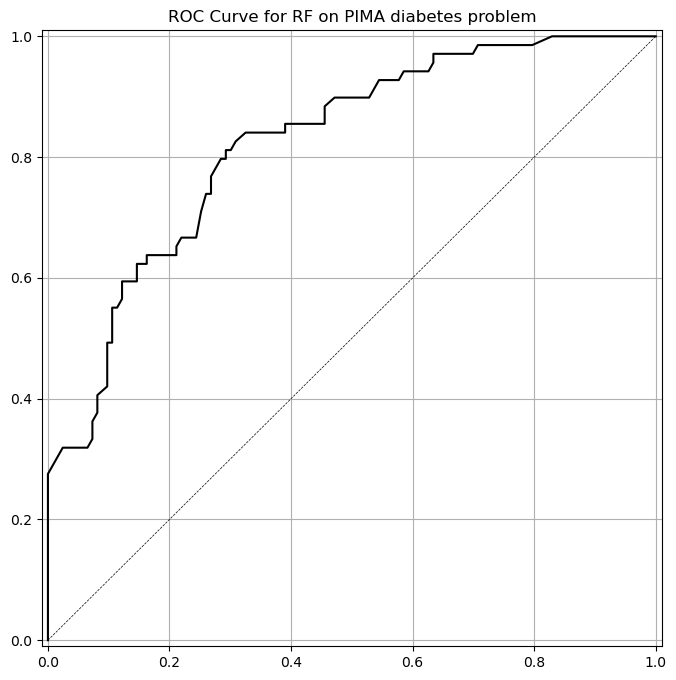

In [13]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')


## Build a Single Hidden Layer Neural Network

We will build a Sequential model to quickly build a neural network.
Our first network will be a single layer network.  We have 8 variables, so input shape is set to 8. The hidden 
layer has 12 nodes.

Final layer has just one node with a sigmoid activation (standard for binary classification)

In [14]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [15]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (8,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [16]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### Fitting the model for 200 epochs.

The fit function returns run history for each epoch*

In [17]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 576 samples, validate on 192 samples
Epoch 1/200
 32/576 [>.............................] - ETA: 2s - loss: 0.6390 - acc: 0.6875

2024-01-22 16:41:57.701431: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-01-22 16:41:57.705646: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394310000 Hz
2024-01-22 16:41:57.706293: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d3914769b0 executing computations on platform Host. Devices:
2024-01-22 16:41:57.706349: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-01-22 16:41:57.752373: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

576/576 [==============================] - 0s 426us/step - loss: 0.6632 - acc: 0.6545 - val_loss: 0.6751 - val_acc: 0.6458
Epoch 2/200
576/576 [==============================] - 0s 100us/step - loss: 0.6622 - acc: 0.6545 - val_loss: 0.6740 - val_acc: 0.6458
Epoch 3/200
576/576 [==============================] - 0s 110us/step - loss: 0.6612 - acc: 0.6545 - val_loss: 0.6729 - val_acc: 0.6458
Epoch 4/200
576/576 [==============================] - 0s 84us/step - loss: 0.6603 - acc: 0.6545 - val_loss: 0.6718 - val_acc: 0.6458
Epoch 5/200
576/576 [==============================] - 0s 125us/step - loss: 0.6593 - acc: 0.6545 - val_loss: 0.6708 - val_acc: 0.6458
Epoch 6/200
576/576 [==============================] - 0s 82us/step - loss: 0.6584 - acc: 0.6545 - val_loss: 0.6698 - val_acc: 0.6458
Epoch 7/200
576/576 [==============================] - 0s 103us/step - loss: 0.6576 - acc: 0.6545 - val_loss: 0.6688 - val_acc: 0.6458
Epoch 8/200
576/576 [==============================] - 0s 80us/step -

The model generates two kinds of predictions, hard predictions and probabilities.

In [18]:
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [19]:
y_pred_class_nn_1[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [20]:
y_pred_prob_nn_1[:10]

array([[0.3293754 ],
       [0.45040524],
       [0.33884022],
       [0.4146525 ],
       [0.24942726],
       [0.38205898],
       [0.23642203],
       [0.35938677],
       [0.551118  ],
       [0.36254662]], dtype=float32)

Checking model accuracy and ROC curve :

accuracy is 0.729
roc-auc is 0.780


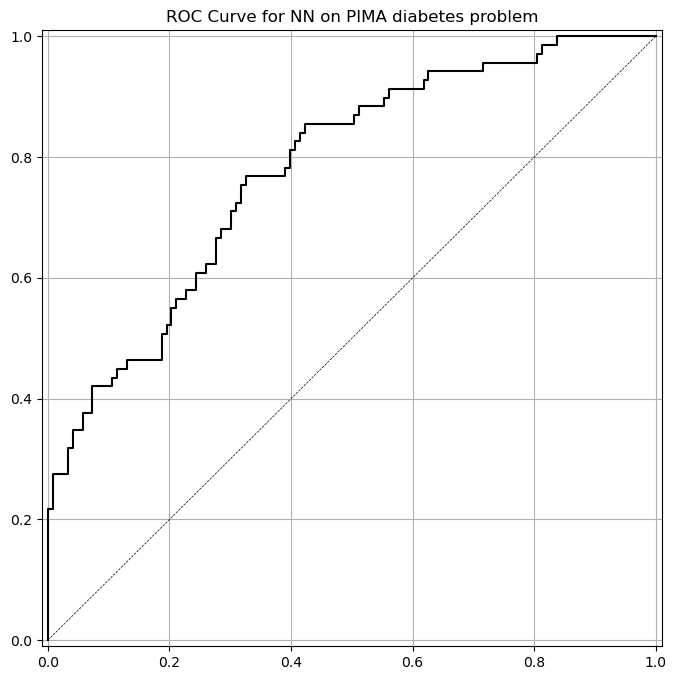

In [21]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

Examining the run_hist_1 object that was created, specifically its history` attribute.

In [22]:
run_hist_1.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Plotting the training loss and the validation loss over the different epochs :


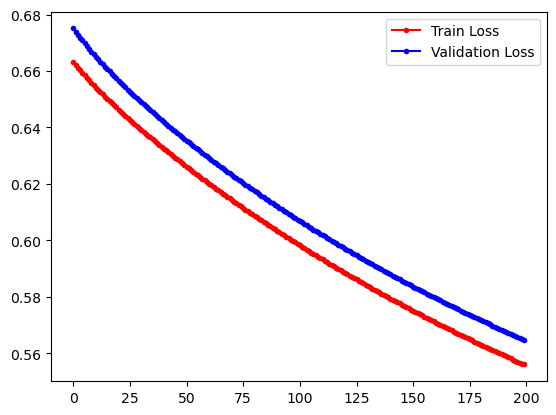

In [23]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.
Training the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.


In [24]:
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 0s 42us/step - loss: 0.5556 - acc: 0.7014 - val_loss: 0.5645 - val_acc: 0.7292
Epoch 2/1000
576/576 [==============================] - 0s 57us/step - loss: 0.5553 - acc: 0.6997 - val_loss: 0.5641 - val_acc: 0.7292
Epoch 3/1000
576/576 [==============================] - 0s 44us/step - loss: 0.5549 - acc: 0.7014 - val_loss: 0.5638 - val_acc: 0.7292
Epoch 4/1000
576/576 [==============================] - 0s 57us/step - loss: 0.5546 - acc: 0.7014 - val_loss: 0.5634 - val_acc: 0.7292
Epoch 5/1000
576/576 [==============================] - 0s 59us/step - loss: 0.5542 - acc: 0.7014 - val_loss: 0.5631 - val_acc: 0.7292
Epoch 6/1000
576/576 [==============================] - 0s 47us/step - loss: 0.5539 - acc: 0.7066 - val_loss: 0.5627 - val_acc: 0.7344
Epoch 7/1000
576/576 [==============================] - 0s 56us/step - loss: 0.5535 - acc: 0.7066 - val_loss: 0.5624 - val_acc: 0.7344
Epoch 8/1

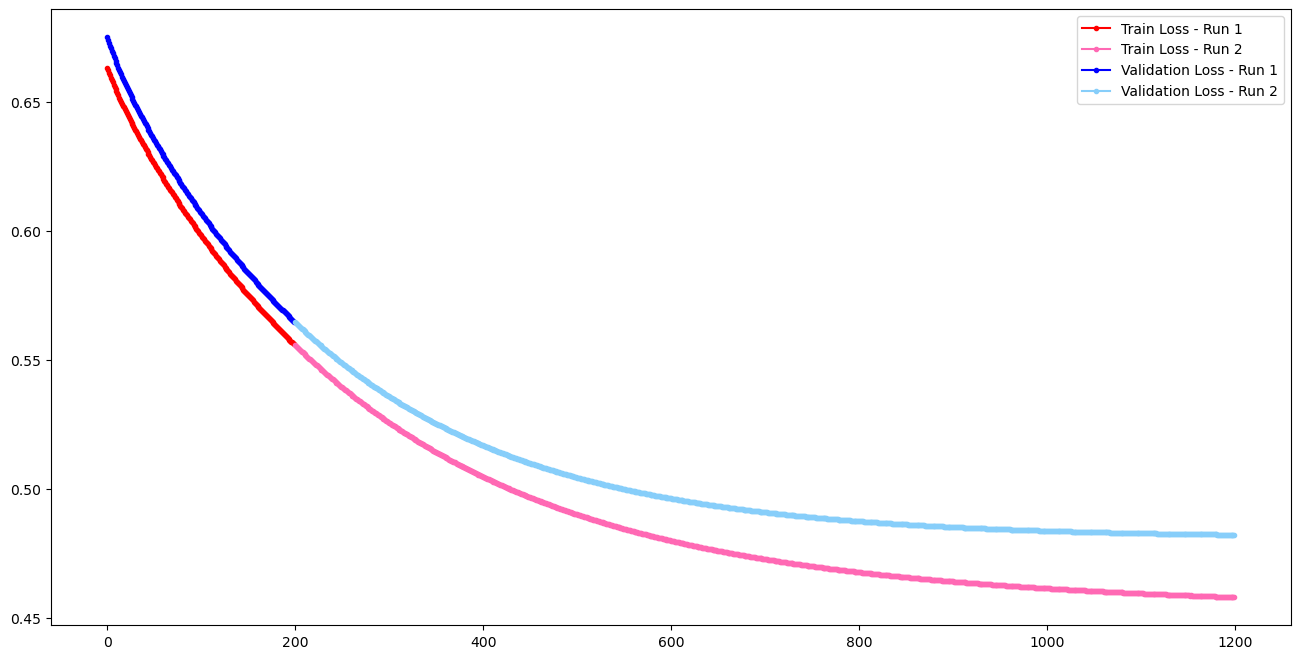

In [25]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

This graph begins where the other left off.  While the training loss is still going down, it looks like the validation loss has stabilized (or even gotten worse!).  This suggests that our network will not benefit from further training. 

#### Now we'll build a with two hidden layers, each with 6 nodes, "relu" activation function for the hidden layers, and "sigmoid" for the final layer, with a learning rate of .003 and training for for 1500 epochs.


In [ ]:
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(8,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Train on 576 samples, validate on 192 samples
Epoch 1/1500
576/576 [==============================] - 0s 405us/step - loss: 0.6825 - acc: 0.5226 - val_loss: 0.7027 - val_acc: 0.4844
Epoch 2/1500
576/576 [==============================] - 0s 114us/step - loss: 0.6796 - acc: 0.5347 - val_loss: 0.6995 - val_acc: 0.4896
Epoch 3/1500
576/576 [==============================] - 0s 121us/step - loss: 0.6768 - acc: 0.5399 - val_loss: 0.6963 - val_acc: 0.5156
Epoch 4/1500
576/576 [==============================] - 0s 179us/step - loss: 0.6740 - acc: 0.5503 - val_loss: 0.6933 - val_acc: 0.5260
Epoch 5/1500
576/576 [==============================] - 0s 134us/step - loss: 0.6713 - acc: 0.5590 - val_loss: 0.6902 - val_acc: 0.5312
Epoch 6/1500
576/576 [==============================] - 0s 111us/step - loss: 0.6686 - acc: 0.5694 - val_loss: 0.6872 - val_acc: 0.5312
Epoch 7/1500
576/576 [==============================] - 0s 103us/step - loss: 0.6660 - acc: 0.5712 - val_loss: 0.6843 - val_acc: 0.5312
Ep

In [ ]:
run_hist_2.history.keys()

In [ ]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["acc"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_acc"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

In [ ]:
y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')
### END SOLUTION